<a href="https://colab.research.google.com/github/jadersonrocha/data-science-challenge-alura-store/blob/main/Desafio_Telecom_parte_dois.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd

In [204]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [205]:
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [206]:
valores_unicos = dados.nunique().sort_values()
print(valores_unicos)


Churn                           2
customer.gender                 2
customer.SeniorCitizen          2
customer.Partner                2
phone.PhoneService              2
customer.Dependents             2
account.PaperlessBilling        2
internet.InternetService        3
internet.DeviceProtection       3
internet.TechSupport            3
internet.OnlineSecurity         3
internet.OnlineBackup           3
internet.StreamingTV            3
internet.StreamingMovies        3
account.Contract                3
phone.MultipleLines             3
account.PaymentMethod           4
customer.tenure                72
Contas_Diarias               1584
account.Charges.Monthly      1584
account.Charges.Total        6530
customerID                   7256
dtype: int64


In [207]:
print(dados.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias'],
      dtype='object')


In [208]:
dados = dados.drop(columns=['customerID'])



In [209]:
print(dados[['Contas_Diarias', 'account.Charges.Monthly', 'account.Charges.Total']].corr())


                         Contas_Diarias  account.Charges.Monthly  \
Contas_Diarias                 1.000000                 1.000000   
account.Charges.Monthly        1.000000                 1.000000   
account.Charges.Total          0.652109                 0.652109   

                         account.Charges.Total  
Contas_Diarias                        0.652109  
account.Charges.Monthly               0.652109  
account.Charges.Total                 1.000000  


In [210]:
categoricas = [
    'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

In [211]:
dados_encoded = pd.get_dummies(dados, columns=categoricas, drop_first=True)

In [212]:
print(dados_encoded.head())
print(dados_encoded.shape)

  Churn  customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0    No                       0                9                     65.6   
1    No                       0                9                     59.9   
2   Yes                       0                4                     73.9   
3   Yes                       1               13                     98.0   
4   Yes                       1                3                     83.9   

   account.Charges.Total  Contas_Diarias  customer.gender_Male  \
0                 593.30        2.186667                 False   
1                 542.40        1.996667                  True   
2                 280.85        2.463333                  True   
3                1237.85        3.266667                  True   
4                 267.40        2.796667                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  ...  \
0                  True                     True           

In [213]:
# Mapeia 'Yes'/'No' e True/False para 1/0
bin_map = {'Yes': 1, 'No': 0, True: 1, False: 0, 'Male': 0, 'Female':1}

# Aplica a transformação em todas as colunas
dados = dados.replace(bin_map)

/tmp/ipython-input-1677278340.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados = dados.replace(bin_map)


In [214]:
# Verifica se ainda há valores não numéricos nas colunas binárias
print(dados.select_dtypes(include='object').nunique())

phone.MultipleLines          3
internet.InternetService     3
internet.OnlineSecurity      3
internet.OnlineBackup        3
internet.DeviceProtection    3
internet.TechSupport         3
internet.StreamingTV         3
internet.StreamingMovies     3
account.Contract             3
account.PaymentMethod        4
dtype: int64


In [215]:
print(dados.head())
print(dados.shape)

   Churn  customer.gender  customer.SeniorCitizen  customer.Partner  \
0    0.0                1                       0                 1   
1    0.0                0                       0                 0   
2    1.0                0                       0                 0   
3    1.0                0                       1                 1   
4    1.0                1                       1                 1   

   customer.Dependents  customer.tenure  phone.PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone.MultipleLines internet.InternetService internet.OnlineSecurity  ...  \
0                   0                      DSL                       0  ...   
1                   1               

In [216]:
dados = dados.drop(columns=['account.PaymentMethod','account.Contract','internet.InternetService','phone.MultipleLines'])

In [217]:
dados

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0.0,1,0,1,1,9,1,0,1,0,1,1,0,1,65.60,593.30,2.186667
1,0.0,0,0,0,0,9,1,0,0,0,0,0,1,0,59.90,542.40,1.996667
2,1.0,0,0,0,0,4,1,0,0,1,0,0,0,1,73.90,280.85,2.463333
3,1.0,0,1,1,0,13,1,0,1,1,0,1,1,1,98.00,1237.85,3.266667
4,1.0,1,1,1,0,3,1,0,0,0,1,1,0,1,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,1,0,0,0,13,1,1,0,0,1,0,0,0,55.15,742.90,1.838333
7252,1.0,0,0,1,0,22,1,0,0,0,0,0,1,1,85.10,1873.70,2.836667
7253,0.0,0,0,0,0,2,1,0,1,0,0,0,0,1,50.30,92.75,1.676667
7254,0.0,0,0,1,1,67,1,1,0,1,1,0,1,0,67.85,4627.65,2.261667


In [218]:
# Contagem absoluta
contagem_churn = dados['Churn'].value_counts()

# Proporção relativa
proporcao_churn = dados['Churn'].value_counts(normalize=True)

# Exibir resultados
print("Contagem absoluta:\n", contagem_churn)
print("\nProporção relativa:\n", proporcao_churn)

Contagem absoluta:
 Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

Proporção relativa:
 Churn
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64


- Classe 0 (ativos): 73.4%
- Classe 1 (evadidos): 26.6%
Conclusão: Há um desequilíbrio moderado — a classe de clientes que evadiram é significativamente menor. Isso pode levar modelos a favorecer a classe majoritária, reduzindo a capacidade de detectar evasoes.



In [219]:
# Selecionar colunas numéricas
numericas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover a variável alvo
numericas.remove('Churn')

print("Colunas numéricas para normalização/padronização:")
print(numericas)

Colunas numéricas para normalização/padronização:
['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']


In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados[numericas] = scaler.fit_transform(dados[numericas])

In [221]:
dados

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0.0,1.011366,-0.441135,1.033356,1.530940,-0.952728,0.328051,0,1,0,1,1,0,0.827229,0.028037,-0.743818,0.028037
1,0.0,-0.988762,-0.441135,-0.967720,-0.653193,-0.952728,0.328051,0,0,0,0,0,1,-1.208855,-0.161183,-0.766256,-0.161183
2,1.0,-0.988762,-0.441135,-0.967720,-0.653193,-1.156341,0.328051,0,0,1,0,0,0,0.827229,0.303568,-0.881554,0.303568
3,1.0,-0.988762,2.266881,1.033356,-0.653193,-0.789837,0.328051,0,1,1,0,1,1,0.827229,1.103603,-0.459685,1.103603
4,1.0,1.011366,2.266881,1.033356,-0.653193,-1.197063,0.328051,0,0,0,1,1,0,0.827229,0.635533,-0.887483,0.635533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,1.011366,-0.441135,-0.967720,-0.653193,-0.789837,0.328051,1,0,0,1,0,0,-1.208855,-0.318866,-0.677871,-0.318866
7252,1.0,-0.988762,-0.441135,1.033356,-0.653193,-0.423333,0.328051,0,0,0,0,0,1,0.827229,0.675369,-0.179387,0.675369
7253,0.0,-0.988762,-0.441135,-0.967720,-0.653193,-1.237786,0.328051,0,1,0,0,0,0,0.827229,-0.479869,-0.964473,-0.479869
7254,0.0,-0.988762,-0.441135,1.033356,1.530940,1.409185,0.328051,1,0,1,1,0,1,-1.208855,0.102729,1.034622,0.102729


In [222]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dados[numericas] = scaler.fit_transform(dados[numericas])

In [223]:
dados

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0.0,1.0,0.0,1.0,1.0,0.112676,1.0,0,1,0,1,1,0,1.0,0.471144,0.066294,0.471144
1,0.0,0.0,0.0,0.0,0.0,0.112676,1.0,0,0,0,0,0,1,0.0,0.414428,0.060420,0.414428
2,1.0,0.0,0.0,0.0,0.0,0.042254,1.0,0,0,1,0,0,0,1.0,0.553731,0.030239,0.553731
3,1.0,0.0,1.0,1.0,0.0,0.169014,1.0,0,1,1,0,1,1,1.0,0.793532,0.140670,0.793532
4,1.0,1.0,1.0,1.0,0.0,0.028169,1.0,0,0,0,1,1,0,1.0,0.653234,0.028687,0.653234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,1.0,0.0,0.0,0.0,0.169014,1.0,1,0,0,1,0,0,0.0,0.367164,0.083556,0.367164
7252,1.0,0.0,0.0,1.0,0.0,0.295775,1.0,0,0,0,0,0,1,1.0,0.665174,0.214043,0.665174
7253,0.0,0.0,0.0,0.0,0.0,0.014085,1.0,0,1,0,0,0,0,1.0,0.318905,0.008533,0.318905
7254,0.0,0.0,0.0,1.0,1.0,0.929577,1.0,1,0,1,1,0,1,0.0,0.493532,0.531831,0.493532


Churn                                            1.000000
internet.InternetService_Fiber optic             0.307463
account.PaymentMethod_Electronic check           0.301455
Contas_Diarias                                   0.192858
account.Charges.Monthly                          0.192858
account.PaperlessBilling_Yes                     0.191454
customer.SeniorCitizen                           0.150541
internet.StreamingTV_Yes                         0.063254
internet.StreamingMovies_Yes                     0.060860
phone.MultipleLines_Yes                          0.040033
phone.PhoneService_Yes                           0.011691
customer.gender_Male                            -0.008545
phone.MultipleLines_No phone service            -0.011691
internet.DeviceProtection_Yes                   -0.066193
internet.OnlineBackup_Yes                       -0.082307
account.PaymentMethod_Mailed check              -0.090773
account.PaymentMethod_Credit card (automatic)   -0.134687
customer.Partn

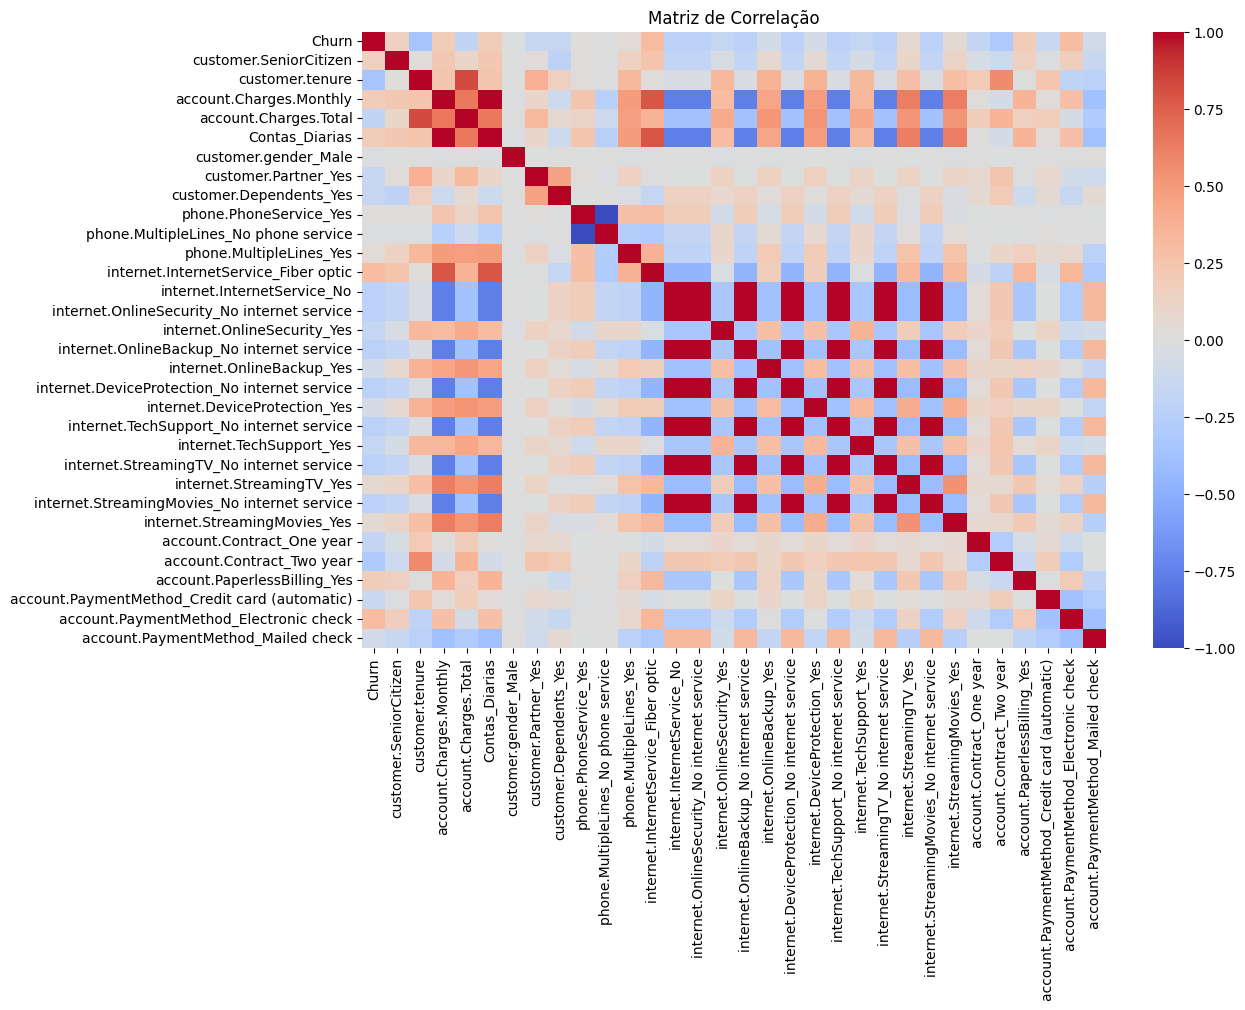

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Churn' e uma coluna numerica
dados_encoded['Churn'] = dados_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Calcular a matriz de correlação
correlation_matrix = dados_encoded.corr(numeric_only=True)
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print(correlation_with_churn)

# Exibir a matriz como heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Variáveis com maior correlação entre si
- customer.tenure ↔ account.Charges.Total: Correlação de 0.83, indicando que quanto mais tempo o cliente permanece, maior o total pago.
- account.Charges.Monthly ↔ Contas_Diarias: Correlação de 1.00, sugerindo que essas variáveis são praticamente equivalentes ou derivadas uma da outra.
- account.Charges.Monthly ↔ account.Charges.Total: Correlação de 0.65, também significativa.



Correlações positivas com Churn (associadas à maior chance de evasão)
- account.PaperlessBilling_Yes
- account.PaymentMethod_Electronic check
- internet.InternetService_Fiber optic
- internet.StreamingTV_Yes
- internet.StreamingMovies_Yes

Essas variáveis indicam que clientes com cobrança digital, pagamento via débito eletrônico, e serviços de fibra/streaming têm maior propensão à evasão.

Correlações negativas com Churn (associadas à permanência)
- customer.tenure
- account.Contract_Two year
- internet.OnlineSecurity_Yes
- internet.TechSupport_Yes
- account.PaymentMethod_Credit card (automatic)
Clientes com maior tempo de contrato, plano de dois anos, suporte técnico e segurança online tendem a permanecer.



In [225]:

import seaborn as sns
import matplotlib.pyplot as plt


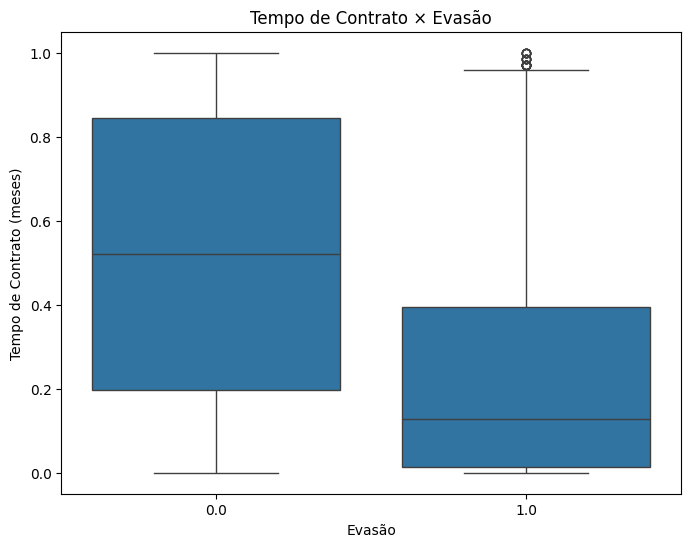

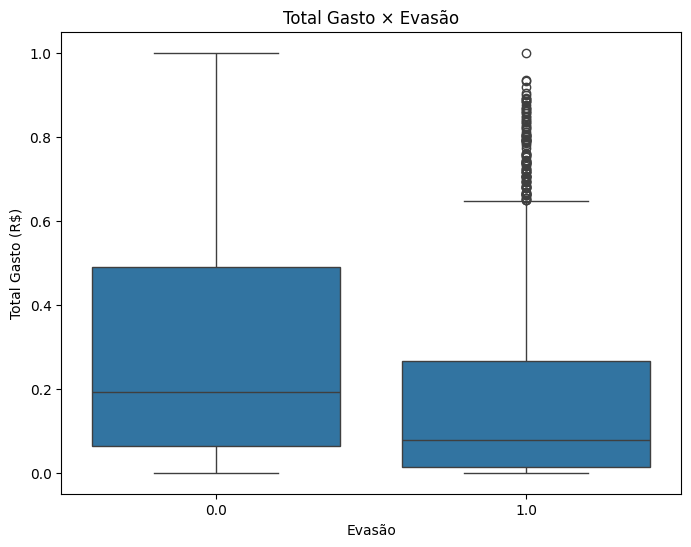

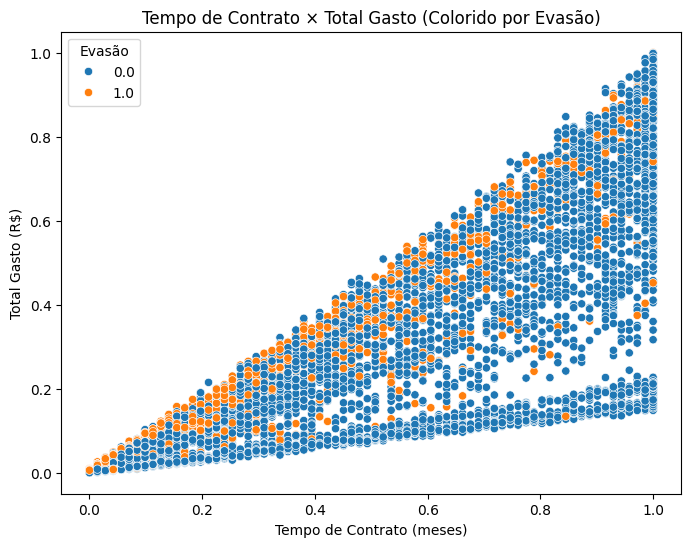

In [226]:
# Boxplot: Tempo de contrato × Evasão
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=dados)
plt.title('Tempo de Contrato × Evasão')
plt.xlabel('Evasão')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

# Boxplot: Total gasto × Evasão
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=dados)
plt.title('Total Gasto × Evasão')
plt.xlabel('Evasão')
plt.ylabel('Total Gasto (R$)')
plt.show()

# Scatter plot: Tempo de contrato × Total gasto, colorido por evasão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=dados)
plt.title('Tempo de Contrato × Total Gasto (Colorido por Evasão)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Evasão')
plt.show()

In [227]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [228]:
X = dados.drop('Churn', axis=1)  # todas as colunas exceto 'Churn'
y = dados['Churn']               # coluna alvo


In [229]:
# Drop rows with NaN in the target variable
dados = dados.dropna(subset=['Churn'])

X = dados.drop('Churn', axis=1)  # todas as colunas exceto 'Churn'
y = dados['Churn']               # coluna alvo

# Divisão 80% treino / 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [230]:
# Verifique os tamanhos
print(f'Treino: {X_train.shape[0]} amostras')
print(f'Teste: {X_test.shape[0]} amostras')


Treino: 5625 amostras
Teste: 1407 amostras


In [253]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [254]:
# Recarregue os dados originais para garantir que todas as colunas estejam presentes
dados = pd.read_csv('/content/dados_tratados.csv')

# Remova a coluna customerID
dados = dados.drop(columns=['customerID'])

# Mapear 'Sim'/'Não' na coluna Churn para 1/0 e lidar com potenciais NaNs
dados['Churn'] = dados['Churn'].map({'Yes': 1, 'No': 0})
dados = dados.dropna(subset=['Churn'])

# Defina a lista completa de variáveis categóricas
categoricas = [
    'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

# Aplicar codificação one-hot às variáveis categóricas
dados_encoded = pd.get_dummies(dados, columns=categoricas, drop_first=True)

# Defina recursos (X) e alvo (y)
X = dados_encoded.drop('Churn', axis=1)
y = dados_encoded['Churn']

# Dividir dados em conjuntos de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Aplicar StandardScaler aos dados de treinamento e teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully processed, split, and scaled.")
print(f'Shape of X_train_scaled: {X_train_scaled.shape}')
print(f'Shape of X_test_scaled: {X_test_scaled.shape}')

Data successfully processed, split, and scaled.
Shape of X_train_scaled: (4922, 31)
Shape of X_test_scaled: (2110, 31)


In [255]:

# 1. Carregar os dados
df = pd.read_csv('/content/dados_tratados.csv')

# Descartar linhas com NaN na variável de destino
df = df.dropna(subset=['Churn'])

# 2. Pré-processamento
# Supondo que 'Churn' seja a variável alvo e o restante sejam preditores
X = df.drop('Churn', axis=1)
y = df['Churn']

# Se houver variáveis categóricas, transforme-as em dummies
X = pd.get_dummies(X, drop_first=True)

# 3. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Normalização (apenas para Regressão Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modelo 1: Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train) # Use scaled data for Logistic Regression
y_pred_log = log_model.predict(X_test_scaled) # Use scaled data for prediction

print("Regressão Logística")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# 6. Modelo 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Regressão Logística
[[1474   75]
 [ 395  166]]
              precision    recall  f1-score   support

          No       0.79      0.95      0.86      1549
         Yes       0.69      0.30      0.41       561

    accuracy                           0.78      2110
   macro avg       0.74      0.62      0.64      2110
weighted avg       0.76      0.78      0.74      2110

Random Forest
[[1420  129]
 [ 309  252]]
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1549
         Yes       0.66      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



Regressão Logística
- Por que normalizar? Porque o modelo calcula coeficientes com base em distâncias e magnitudes. Sem normalização, variáveis com escalas maiores dominam o modelo.
- Vantagens: Interpretação clara dos coeficientes, bom desempenho com dados lineares.

Random Forest
- Por que não normalizar? Árvores dividem os dados com base em regras de decisão (ex: “gasto > 500”), não em distâncias.
- Vantagens: Captura relações não lineares, lida bem com variáveis categóricas e outliers.


In [247]:
#Avaliando cada modelo utilizando as seguintes métricas: Acurácia Precisão Recall F1-score Matriz de confusão

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def avaliar_modelo(nome, y_true, y_pred):
    print(f"\nAvaliação: {nome}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))
    print(f"Acurácia:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão:  {precision_score(y_true, y_pred, pos_label='Yes'):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, pos_label='Yes'):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred, pos_label='Yes'):.4f}")

# Avaliar Regressão Logística
avaliar_modelo("Regressão Logística", y_test, y_pred_log)

# Avaliar Random Forest
avaliar_modelo("Random Forest", y_test, y_pred_rf)


Avaliação: Regressão Logística
Matriz de Confusão:
[[1474   75]
 [ 395  166]]
Acurácia:  0.7773
Precisão:  0.6888
Recall:    0.2959
F1-score:  0.4140

Avaliação: Random Forest
Matriz de Confusão:
[[1420  129]
 [ 309  252]]
Acurácia:  0.7924
Precisão:  0.6614
Recall:    0.4492
F1-score:  0.5350


In [248]:
print("Acurácia treino - RF:", accuracy_score(y_train, rf_model.predict(X_train)))
print("Acurácia teste  - RF:", accuracy_score(y_test, y_pred_rf))


Acurácia treino - RF: 1.0
Acurácia teste  - RF: 0.7924170616113744


Regressão Logística — Coeficientes


In [249]:
import numpy as np

# Extrair os coeficientes
coeficientes = pd.Series(log_model.coef_[0], index=X.columns)

# Ordenação por importância
coef_ordenados = coeficientes.sort_values(key=abs, ascending=False)

print("Coeficientes da Regressão Logística:")
print(coef_ordenados.head(10))


Coeficientes da Regressão Logística:
customer.tenure                          -0.676973
internet.InternetService_Fiber optic      0.514890
account.Charges.Total                    -0.482566
account.PaymentMethod_Electronic check    0.460641
account.Contract_Two year                -0.430125
account.Contract_One year                -0.425870
internet.TechSupport_Yes                 -0.381083
internet.OnlineSecurity_Yes              -0.344382
account.PaperlessBilling_Yes              0.267067
customer.SeniorCitizen                    0.225196
dtype: float64


Random Forest

In [250]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_ordenadas = importances.sort_values(ascending=False)

print("Importância das Variáveis no Random Forest:")
print(importances_ordenadas.head(10))


Importância das Variáveis no Random Forest:
account.Charges.Total                     0.094204
customer.tenure                           0.092369
Contas_Diarias                            0.073875
account.Charges.Monthly                   0.071020
account.PaymentMethod_Electronic check    0.025008
internet.InternetService_Fiber optic      0.021606
account.Contract_Two year                 0.021449
internet.TechSupport_Yes                  0.019727
account.Contract_One year                 0.018152
account.PaperlessBilling_Yes              0.016580
dtype: float64


KNN — Influência por proximidade


In [251]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

# Treinar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Importância por permutação
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
knn_importances = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

print("Importância das Variáveis no KNN:")
print(knn_importances.head(10))

KeyboardInterrupt: 

In [252]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

svm_coef = pd.Series(svm.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

print("⚔️ Coeficientes do SVM:")
print(svm_coef.head(10))

⚔️ Coeficientes do SVM:
account.Contract_One year                -0.086387
internet.InternetService_Fiber optic      0.082262
customer.tenure                          -0.073483
internet.TechSupport_Yes                 -0.073034
account.PaymentMethod_Electronic check    0.066876
account.Contract_Two year                -0.053047
internet.OnlineBackup_Yes                -0.051882
account.Charges.Total                    -0.049458
customer.Dependents_Yes                  -0.040910
customer.Partner_Yes                     -0.039652
dtype: float64
